# Homework 1: Reading data and regression
## Due September 5th

In class we've been working on developing the tools for linear regression.  In this homework, we'll use those tools to show that one of the original 'big data' problems can be solved quite credibly with ordinary least squares.  Note that this exercise is primarily intended to do two things: 1) provide you with some practice gathering data, and 2) evaluate your ability to reason somewhat abstractly about models.  With respect to the second point, it is in your grade's interest to provide complete and well-reasoned answers to narrative questions posed.  A correct answer can be awarded very few points if its reasoning is absent or unclear, and an incorrect answer can be awarded full points if it is well argued.   

Please turn in your work via github classroom.

## The big one
If you've ever lived in an area prone to seismic activity, you know that people are always a little apprehensive about *the big one*, that giant earthquake (Magnitude greater than 7) that is going to break the pots and collapse the overpasses.  However, the big one rarely happens... until it does.  What happens more frequently is smaller earthquakes.  And even more frequently than that, even smaller earthquakes.  In fact, it's long been understood that earthquake frequency has an inverse relationship with magnitude.  Here, we're going to quantify that relationship for the west coast of the US.  

## Data wrangling
The first thing that we'll need to do is to aquire a dataset that can help us say something about earthquake frequency.  Fortunately, the United States Geologic Survey keeps such a database.  

First, navigate to https://earthquake.usgs.gov/earthquakes/search/.  This is the USGS' central repository for earthquake data.  We'll be interested in data from the last twenty years.  Enter the appropriate date.  Next, we're interested in data from the west coast of the lower 48.  Use the Custom Geographic Region button on the right side of the page, followed by the Draw Rectangle on the Map button.  Draw a rectangle around the west coast, from the Canadian to Mexican border.  Next, open the Output Options tab and select .csv (comma separated values, a plain text format).  Finally, under Limit Results, enter 19999 (the site will throw an error if you make this value bigger).  This series of commands will deliver the ~20k most recent earthquakes of all sizes to occur in this region of the world.  It may take a moment for their server to pull your query together. Download the file.

Next, import the data into ipython.  This is easily done with [Pandas' read_csv function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

In [3]:
# Use pandas to import the earthquake data file here
from pprint import pprint
import pandas

earthquake_filename = "earthquakes.csv" #I renamed the downloaded USGS file.
earthquakes = pandas.read_csv(earthquake_filename)
pprint(earthquakes) #PPrint makes datastructures more readable than print.

                           time   latitude   longitude   depth   mag magType  \
0      2019-09-03T08:23:33.250Z  36.199000 -117.885000   2.540  2.59      ml   
1      2019-09-03T03:41:29.230Z  35.701668 -117.587830   5.340  3.47      mw   
2      2019-09-03T03:28:37.320Z  35.631000 -117.434333   2.970  2.67      ml   
3      2019-09-03T02:32:14.860Z  35.671001 -117.521332   9.470  3.20      ml   
4      2019-09-03T02:29:20.280Z  35.669167 -117.524333  10.020  2.79      ml   
...                         ...        ...         ...     ...   ...     ...   
19994  2005-01-11T02:47:34.350Z  35.227500 -118.570667   4.578  2.84      ml   
19995  2005-01-10T12:13:12.750Z  38.012000 -118.711333   5.082  3.18      ml   
19996  2005-01-09T18:35:54.400Z  36.896167 -121.627167   6.983  2.52      md   
19997  2005-01-09T10:18:05.940Z  46.197167 -122.186000  -1.471  2.80      md   
19998  2005-01-09T00:19:34.310Z  37.312000 -122.125500   4.102  2.54      md   

        nst   gap     dmin   rms  ...  

Interrogate the Pandas dataframe for the available fields using its built in method 'keys'


In [4]:
earthquake_keys = list(earthquakes.keys()) #Getting the available fields in the pandas data frame.
pprint(earthquake_keys) 

['time',
 'latitude',
 'longitude',
 'depth',
 'mag',
 'magType',
 'nst',
 'gap',
 'dmin',
 'rms',
 'net',
 'id',
 'updated',
 'place',
 'type',
 'horizontalError',
 'depthError',
 'magError',
 'magNst',
 'status',
 'locationSource',
 'magSource']


We're primarily interested in determining the relationship between relative frequency and magnitude.  Extract the magnitude variable from the pandas data frame using the 'mag' key.  

Next, you'll need to determine the number of earthquakes that occured in the data as a function of magnitude.  This is easily done by deciding on a set of bins, and then counting the number of items in each bin.  This is also known as a [histogram](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html), and is easily computed using either numpy or matplotlib.  You'll want to use a fairly large number of bins, say 50 (equally spaced).  *Note that the histogram function provided by either of the above libraries returns total counts rather than relative frequencies: you'll need to compute relative frequencies by dividing the returned counts by the total number of earthquakes in the dataset.*

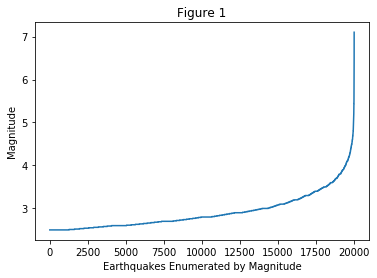

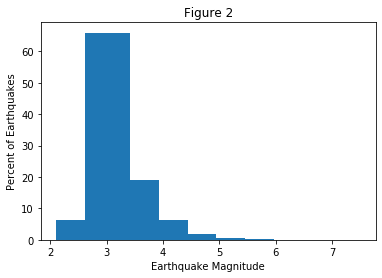

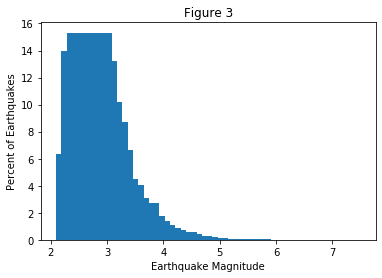

In [66]:
magnitude_list = earthquakes["mag"] #Extracting the magnitude variable from the pandas data frame.

"""
1) Enumerating each earthquake sorted by magnitude 
2) Figure 1 shows 17,500 earthquakes with magnitude 4 or less. This supports the claim that magnitude and 
frequency are inversely correlated.
"""
import numpy as np
import matplotlib.pyplot as plt
sorted_matnitudes = sorted(magnitude_list)
plt.plot(sorted_matnitudes)
plt.title("Figure 1")
plt.xlabel("Earthquakes Enumerated by Magnitude")
plt.ylabel("Magnitude")
plt.show()

"""
1) I will test 10 and 50 bins using the function make_histogram.
2) 50 bins looks good as seen in Figure 3.
"""
def make_histogram(magnitude_list, bin_count):
    min_val = min(magnitude_list)
    max_val = max(magnitude_list)
    
    histogram_x = np.linspace(min_val, max_val, bin_count)
    histogram_y = [0 for i in range(len(histogram_x))]
    
    bin_i = 0
    for i, value in enumerate(sorted(magnitude_list)):
        while value > histogram_x[bin_i]:
            bin_i += 1
        histogram_y[bin_i] += 1
    
    return histogram_x, histogram_y
    
for i, bin_count in enumerate([10, 50]):
    histogram_x, histogram_y = make_histogram(magnitude_list, bin_count)
    percent_y = [count / len(magnitude_list) * 100 for count in histogram_y]
    plt.bar(histogram_x, percent_y)
    plt.xlabel("Earthquake Magnitude")
    plt.ylabel("Percent of Earthquakes")
    plt.title("Figure {}".format(2 + i))
    plt.show()



**(20 pts) Make a plot with bin centroids on the $x$-axis and relative frequency on the $y$-axis.  Based on your results, please provide a few sentences describing whether the model $y = w_0 + w_1 x$ is a good fit to the data, if $x$ represents earthquake magnitude and $y$ represents relative frequency.**

1) A line can be fit to Figure 4 with many different slopes but each will only aproximate a few values. 
For example, from magnitude 6 to 7 the slope appears to be close to 0, but from magnitude 3 to 3.5 the
slope is greater than 90 degrees relative to the x axis. Therefore, no values given to w0 or w1 aproximate
the real depedent variable for the model y = w0 + w1 * x.

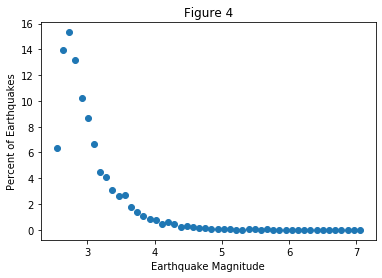

In [67]:
min_val = min(magnitude_list)
max_val = max(magnitude_list)
bin_count = 50
bin_list = np.linspace(min_val, max_val, bin_count)
bin_size = (max_val - min_val) / bin_count
half_bin = bin_size / 2
centroid_list = [(min_val + half_bin) + (bin_size * bin_i) for bin_i in range(bin_count)]
histogram_x, histogram_y = make_histogram(magnitude_list, bin_count)
percent_y = [count / len(magnitude_list) * 100 for count in histogram_y]
plt.scatter(centroid_list, percent_y)
plt.xlabel("Earthquake Magnitude")
plt.ylabel("Percent of Earthquakes")
plt.title("Figure 4")
plt.show()

As it turns out, a physical model that gives the predicted relative frequency of earthquakes of different magnitudes can be derived from physics, and is given by a so-called *power-law*
$$
y = ax^b
$$
**(20pts) If you wanted to directly fit this power-law model to these data, would you be able to use the linear regression code that we've already developed to do so?  If so, how?  If not, why not?**

1) The power function is non-linear because the power variable (b) is a parameter and not a constant. Our poly_fit equation from the notes 02-probability fits a polynomial not a power function. But the log of the power law is linear in its parameters. ln y = ln a + b ln x.

As it turns out, it is not possible to use linear regression to fit this model directly.  However, it can be done by using a clever transformation of the data.  **(20pts) Plot the base-10 logarithm of the event counts.  Now does a linear model seem like a good fit?  If the power law is a good fit to the untransformed data, why does it make sense that a linear model should fit the log-transformed data (HINT: take the logarithm of both sides of the power law)**

1) Log counts of earthquakes does produce a more linear graph, with some outliers at the lowest and highest extremes for my data. Figure 5.
2) The log of the observed dependent variable should fit the log of the power law model, because the model's output will also be transformed into log space. In figure 6 I fit a polynomial (degree 1) using numpy and the log of the independent variable, which is the array of centroids. And in figure 7 I fit a polynomial of degree(2).
3) As mentioned in lecture 1 I used the least squares algorithm to model my y values. I beleive outliers in my data made modeling earthquakes more challenging than if I had which followed an exponential decay in frequency as magnitude increased. Figure 8.
4) The power law and the least squares models tied in regards to sum squared error with a value of 3.5. The best model was a polynomial of degree 2 in log space as seen in Figure 6.

Finally, **(40pts) use one of the methods that you developed for linear regression in class to fit a line to the log-transformed counts.  What is the slope of that line?  Is the model a good fit for all sizes of earthquake?**

!Answers go here

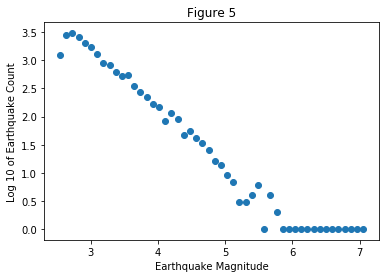

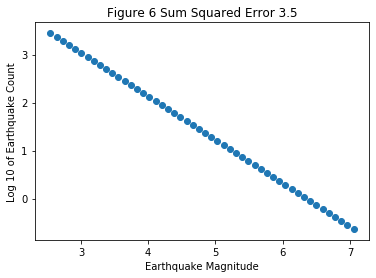

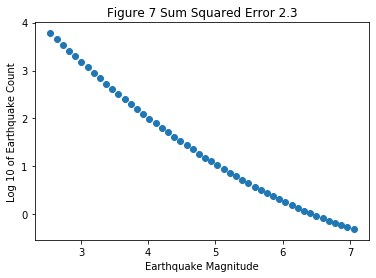

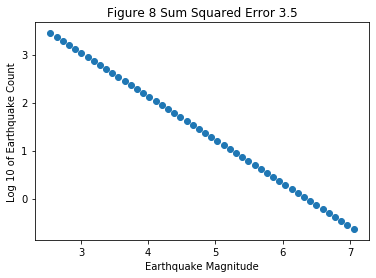

In [110]:
import math
log_y = [math.log10(value) if value else 0 for value in histogram_y]
plt.scatter(centroid_list, log_y)
plt.xlabel("Earthquake Magnitude")
plt.ylabel("Log 10 of Earthquake Count")
plt.title("Figure 5")
plt.show()

a, b = np.polyfit(centroid_list, log_y, 1)
model_y = [a * value + b for value in centroid_list]
predicted_actual = zip(model_y, log_y)
sum_squared_error = sum((p - a) ** 2 for p, a in predicted_actual)
plt.scatter(centroid_list, model_y)
plt.xlabel("Earthquake Magnitude")
plt.ylabel("Log 10 of Earthquake Count")
plt.title("Figure 6 Sum Squared Error {:0.2}".format(sum_squared_error))
plt.show()

a, b, c = np.polyfit(centroid_list, log_y, 2)
model_y = [a * value ** 2 + b * value + c for value in centroid_list]
predicted_actual = zip(model_y, log_y)
sum_squared_error = sum((p - a) ** 2 for p, a in predicted_actual)
plt.scatter(centroid_list, model_y)
plt.xlabel("Earthquake Magnitude")
plt.ylabel("Log 10 of Earthquake Count")
plt.title("Figure 7 Sum Squared Error {:0.2}".format(sum_squared_error))
plt.show()

A = np.vstack([centroid_list, [1.0 for i in centroid_list]]).T
a, b = np.linalg.lstsq(A, log_y, rcond=None)[0]
model_y = [a * value + b for value in centroid_list]
predicted_actual = zip(model_y, log_y)
sum_squared_error = sum((p - a) ** 2 for p, a in predicted_actual)
plt.scatter(centroid_list, model_y)
plt.xlabel("Earthquake Magnitude")
plt.ylabel("Log 10 of Earthquake Count")
plt.title("Figure 8 Sum Squared Error {:0.2}".format(sum_squared_error))
plt.show()